In [1]:
import pandas as pd

In [2]:
# Read the Dataset
dataframe = pd.read_csv("sales_data_sample.csv")

In [3]:
# Create a Copy of the Dataset, we will work on this Copy
df = dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
# Drop the Unnecessary Columns
df = df[['ORDERLINENUMBER', 'SALES']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERLINENUMBER  2823 non-null   int64  
 1   SALES            2823 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.2 KB


In [10]:
df.isna().sum()

ORDERLINENUMBER    0
SALES              0
dtype: int64

In [12]:
# Standard Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

# This tries to make the Mean 0 and the Standard Deviation as 1

In [13]:
# Import KMeansClustering

from sklearn.cluster import KMeans

In [17]:
# Finding k with the Elbow Method

# Within Cluster Sum of Squares of Distances
wcss = [] 

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

# The inertia is computed as the sum of squared distances from each data point to the center of its assigned cluster 

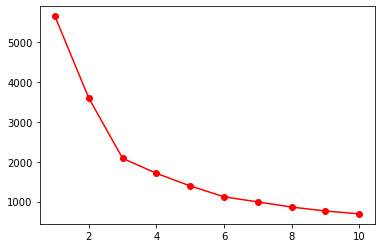

In [18]:
# Plot the Elbow Plot
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss,'ro-')
plt.show()

In [19]:
# K = 7 seems to be a better choice for k

In [20]:
kmeans_model = KMeans(n_clusters=7)

In [21]:
cluster = kmeans_model.fit_predict(scaled_values)

In [23]:
import warnings
warnings.filterwarnings('ignore')
df['Cluster'] = cluster

In [24]:
df

,ORDERLINENUMBER,SALES,Cluster
0,2,2871.00,5
1,5,2765.90,5
2,2,3884.34,2
3,6,3746.70,2
4,14,5205.27,3
...,...,...,...
2818,15,2244.40,4
2819,1,3978.51,2
2820,4,5417.57,1
2821,1,2116.16,5


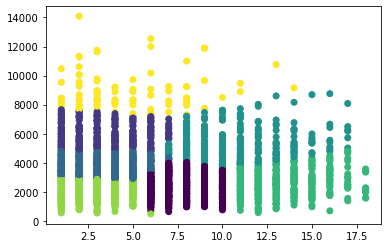

In [26]:
plt.scatter(df['ORDERLINENUMBER'], df['SALES'],c=df['Cluster'])

In [ ]:
# The above scatter plot shows the distribution of Clusters